In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
# Re-loading the data from the provided file
df = pd.read_excel('K_collection.xlsx',sheet_name='Cd')# chance to ('Skin',')

In [15]:
# Perform statistical analysis on column number 9 (index 8 in 0-based indexing)
column_9_stats = df.iloc[:, 1].describe()

# Print the results
print(column_9_stats)

count    10449.000000
mean         0.005197
std          0.003563
min          0.000100
25%          0.001000
50%          0.005000
75%          0.010000
max          0.010000
Name: storg, dtype: float64


In [71]:
test = pd.read_excel('Skin_collection.xlsx',sheet_name='val_s')# chance to ('Skin',')

In [147]:
# # Histogram
# df = pd.read_excel('All_Senarios.xlsx',sheet_name='K')# chance to ('Skin',')
# plt.figure(figsize=(6,4))
# df['K'].hist(bins=10)
# plt.title('Histogram of the Column')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()

In [3]:
# # Generate a sample DataFrame for demonstration
# # Replace this with your actual data
# np.random.seed(42)
# df1 = pd.read_excel('All_Data.xlsx',sheet_name='Normally')

# def find_largest_normal_subset(df, column_name):
#     """
#     Find the largest subset of the data that is normally distributed.
#     """
#     max_size = 0
#     best_subset = pd.DataFrame()

#     # Sort the data to start with a large subset and reduce the size iteratively
#     sorted_data = df[column_name].sort_values()

#     for size in range(len(sorted_data), 0, -1):
#         subset = sorted_data.iloc[:size]
#         stat, p_value = shapiro(subset)

#         # Check if the subset is normally distributed (p-value > 0.05)
#         if p_value > 0.05:
#             max_size = size
#             best_subset = subset
#             break

#     return best_subset

# # Find the largest normal subset
# largest_normal_subset = find_largest_normal_subset(df1, 'sample')
# print("Largest subset size:", len(largest_normal_subset))

# # Visualize the results
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 6))
# sns.histplot(largest_normal_subset, kde=True, bins=30)
# plt.title('Histogram of the Largest Normal Subset')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()

In [26]:
# # GPT say that this can lead to data leackage
# # Get df values
# X = data_recheck.values
# list = [9] # Labels index (K=9, L=10 ,Skin=11)

# # t = X[:,14:114].astype(float)
# # p = X[:,114:214].astype(float)
# # dp = X[:,214:314].astype(float)
# # output = X[:,list].astype(float)

# # Dimenstionless
# t = X[:,314:414].astype(float)
# p = X[:,414:514].astype(float)
# dp = X[:,514:614].astype(float)
# output = X[:,list].astype(float)

# # Standardize the input data
# scaler_t = StandardScaler()
# scaler_p = StandardScaler()
# scaler_dp = StandardScaler()

# t_standardized = scaler_t.fit_transform(np.log(t))
# p_standardized = scaler_p.fit_transform(np.log(p))
# dp_standardized = scaler_dp.fit_transform(np.log(dp))

# # Scale the output data
# scaler_output = StandardScaler()
# output_standardized = scaler_output.fit_transform(output.reshape(-1, 1)).flatten()


# # Combine t, p, and dp into a single array for each test
# combined_data = np.stack((t, p, dp), axis=2)



# # Split the data into training (70%), validation (20%), and test (10%) sets
# # First, split into train (70%) and temp (30%)
# X_train, X_temp, y_train, y_temp = train_test_split(combined_data, output_standardized, test_size=0.3, random_state=42, shuffle=True)

# # Then, split the temp into validation (20%) and test (10%)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, shuffle=True)

# # Check the shapes of the splits
# print("Train data shape:", X_train.shape, y_train.shape)
# print("Validation data shape:", X_val.shape, y_val.shape)
# print("Test data shape:", X_test.shape, y_test.shape)

In [61]:
# Assuming df is your DataFrame
t = df.iloc[:, 315:415]
dp = df.iloc[:, 515:615]
target = df.iloc[:, 9]

# Dividing each value in t and dp by the corresponding target value for each row
t_normalized = t.div(target, axis=0)
dp_normalized = dp.div(target, axis=0)

# You can replace the original columns with the normalized columns if desired
df.iloc[:, 315:415] = t_normalized
df.iloc[:, 515:615] = dp_normalized

# # Create a new DataFrame with the normalized columns
# normalized_df = pd.concat([t_normalized, dp_normalized], axis=1)


# normalized_df.head()  # Display the first few rows to check the results
###############################################
t1 = test.iloc[:, 315:415]
dp1 = test.iloc[:, 515:615]
target1 = test.iloc[:, 9]

# Dividing each value in t and dp by the corresponding target value for each row
t_normalized1 = t1.div(target1, axis=0)
dp_normalized1 = dp1.div(target1, axis=0)

# You can replace the original columns with the normalized columns if desired
test.iloc[:, 315:415] = t_normalized1
test.iloc[:, 515:615] = dp_normalized1

In [62]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Get df values
X = data_recheck.values
list = [14] # Labels index (K=9, L=10, Skin=11)
# Dimensionless
t = X[:,315:415].astype(float)# tD/CD
p = X[:,415:515].astype(float)
dp = X[:,515:615].astype(float)
output = X[:,list].astype(float)

# Combine t, p, and dp into a single array for each test
combined_data = np.stack((t, p, dp), axis=2)

# Split the data into training (70%), validation (20%), and test (10%) sets
# First, split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(combined_data, output, test_size=0.3, random_state=42, shuffle=True)

# Then, split the temp into validation (20%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, shuffle=True)

# Reshape y_train, y_val, y_test for scaling
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Standardize the training input data
scaler_t = StandardScaler()
scaler_p = StandardScaler()
scaler_dp = StandardScaler()

t_train_standardized = scaler_t.fit_transform(np.log(X_train[:, :, 0]))
#p_train_standardized = scaler_p.fit_transform(np.log(X_train[:, :, 1]))
dp_train_standardized = scaler_dp.fit_transform(np.log(X_train[:, :, 2]))

# Transform validation and test input data using the scalers fitted on the training data
t_val_standardized = scaler_t.transform(np.log(X_val[:, :, 0]))
#p_val_standardized = scaler_p.transform(np.log(X_val[:, :, 1]))
dp_val_standardized = scaler_dp.transform(np.log(X_val[:, :, 2]))

t_test_standardized = scaler_t.transform(np.log(X_test[:, :, 0]))
#p_test_standardized = scaler_p.transform(np.log(X_test[:, :, 1]))
dp_test_standardized = scaler_dp.transform(np.log(X_test[:, :, 2]))

# Standardize the output data
scaler_output = StandardScaler()
output_train_standardized =  scaler_output.fit_transform(y_train).flatten()
output_val_standardized = scaler_output.transform(y_val).flatten()
output_test_standardized = scaler_output.transform(y_test).flatten()

# Combine standardized t, p, and dp into a single array for each test
X_train_standardized =   np.stack((t_train_standardized,  dp_train_standardized), axis=2)
X_val_standardized =  np.stack((t_val_standardized,  dp_val_standardized), axis=2)
X_test_standardized =  np.stack((t_test_standardized,  dp_test_standardized), axis=2)


X_train= X_train_standardized
y_train = output_train_standardized
X_test= X_test_standardized
y_test= output_test_standardized
X_val= X_val_standardized
y_val= output_val_standardized


# Check the shapes of the splits
print("Train data shape:", X_train_standardized.shape, output_train_standardized.shape)
print("Validation data shape:", X_val_standardized.shape, output_val_standardized.shape)
print("Test data shape:", X_test_standardized.shape, output_test_standardized.shape)

Train data shape: (4037, 100, 2) (4037,)
Validation data shape: (1154, 100, 2) (1154,)
Test data shape: (577, 100, 2) (577,)


In [72]:
# Get df values
X = test.values
list = [14] # Labels index (K=9, L=10, Skin=11)
# Dimensionless
t = X[:,315:415].astype(float)# tD/CD
p = X[:,415:515].astype(float)
dp = X[:,515:615].astype(float)
output = X[:,list].astype(float)

# Combine t, p, and dp into a single array for each test
combined_data = np.stack((t, p, dp), axis=2)

X_field = combined_data

# Reshape y_train, y_val, y_test for scaling
y_field = output.reshape(-1, 1)


t_field_standardized = scaler_t.transform(np.log(X_field[:, :, 0]))
#p_field_standardized = scaler_p.transform(np.log(X_field[:, :, 1]))
dp_field_standardized = scaler_dp.transform(np.log(X_field[:, :, 2]))
output_field_standardized =  scaler_output.transform(y_field).flatten()

X_field_standardized =  np.stack((t_field_standardized,  dp_field_standardized), axis=2)

X_field= X_field_standardized
y_field = output_field_standardized

print("Test data shape:", X_field_standardized.shape, output_field_standardized.shape)

Test data shape: (41, 100, 2) (41,)


In [10]:
# #CNN-LSTM (permeability)
# from keras.models import Sequential
# from keras.layers import Conv1D, Dense, LSTM, Dropout, Flatten, BatchNormalization

# # Define the LSTM-CNN model
# model = Sequential()
# model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(combined_data.shape[1], combined_data.shape[2])))# 
# model.add(BatchNormalization())

# # Adding another Conv1D layer
# # Ensure the number of filters and kernel size are appropriate for your data
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
# # It's usually a good idea to add some form of regularization like Dropout here
# #model.add(Dropout(0.2))

# # LSTM layer
# #model.add(LSTM(10))
# model.add(Flatten())
# # Dense layer
# model.add(Dense(64, activation='relu'))

# # Output layer
# model.add(Dense(1, activation='linear'))  # linear activation for regression tasks

# # Compile the model (ensure you have the right optimizer and loss function for your task)
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# # Model summary
# model.summary()

In [10]:
# import matplotlib.pyplot as plt
# # Plot distributions of the output
# plt.figure(figsize=(12, 6))

# plt.subplot(2, 2, 1)
# plt.hist(output_train_standardized, bins=20, alpha=0.5, label='Train')
# plt.title('Train Data Distribution')
# plt.legend()

# plt.subplot(2, 2, 2)
# plt.hist(output_val_standardized, bins=20, alpha=0.5, label='Validation')
# plt.title('Validation Data Distribution')
# plt.legend()

# plt.subplot(2, 2, 3)
# plt.hist(output_test_standardized, bins=20, alpha=0.5, label='Test')
# plt.title('Test Data Distribution')
# plt.legend()


In [11]:
# # Sample field data (replace this with your actual field data)
# Y = test.values
# field_output = Y[:, list].astype(float)
# field_output_standardized = scaler_output.transform(field_output.reshape(-1, 1)).flatten()

# plt.subplot(2, 2, 4)
# plt.hist(field_output, bins=20, alpha=0.5, label='Field')
# plt.title('Field Data Distribution')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [77]:
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout, LSTM
# Define the model creation function with optimal hyperparameters
# def CNN_LSTM():
#     model = Sequential()
#     model.add(Conv1D(filters=128, kernel_size=5, strides=2, activation='relu', 
#                      input_shape=(X_train.shape[1], 2)))
#     model.add(BatchNormalization())
#     model.add(MaxPooling1D(pool_size=2, strides=2))  # 1D Max-Pooling with stride=2, kernel size=2
    
#     model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling1D(pool_size=2, strides=2))  # 1D Max-Pooling with stride=2, kernel size=2

#     model.add(LSTM(90))
#     model.add(Dropout(0.5))
#     model.add(Flatten())
    
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(1, activation='linear'))

#     model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])
#     return model


def CNN_LSTM():
    model = Sequential()
    
    # First Conv1D layer with L2 regularization
    model.add(Conv1D(filters=96, 
                     kernel_size=3, 
                     activation='relu', 
                     input_shape=(X_train.shape[1], 2),
                     kernel_regularizer=l2(0.007)))
    model.add(BatchNormalization())

    # Second Conv1D layer with L2 regularization
    model.add(Conv1D(filters=96, 
                     kernel_size=7, 
                     activation='relu',
                     kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())

    # Dropout layer
    model.add(Dropout(rate=0.2))

    # LSTM layer
    model.add(LSTM(30, return_sequences=True))
    model.add(Flatten())

    # Dense layer with L2 regularization
    model.add(Dense(32, 
                    activation='relu', 
                    kernel_regularizer=l2(0.002)))
    model.add(Dropout(rate=0.1))

    # Output layer
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])
    return model
# def CNN():
#     model = Sequential()
#     model.add(Conv1D(filters=96, kernel_size=3, activation='relu', 
#                      input_shape=(X_train.shape[1], 2)))
#     model.add(BatchNormalization())
    
#     model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
#     model.add(BatchNormalization())

#     model.add(Dropout(0.2))
#     model.add(Flatten())
    
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(1, activation='linear'))

#     model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
#     return model


def CNN():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=5, strides=2, activation='relu',kernel_regularizer=l2(0.003), 
                     input_shape=(X_train.shape[1], 2)))  # 1D Convolution with stride=2, kernel size=5
    model.add(BatchNormalization())
    
    model.add(MaxPooling1D(pool_size=2, strides=2))  # 1D Max-Pooling with stride=2, kernel size=2
    
    model.add(Conv1D(filters=32, kernel_size=3,kernel_regularizer=l2(0.007), activation='relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=2, strides=2))  # 1D Max-Pooling with stride=2, kernel size=2
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model


# Create the model
model = CNN_LSTM()

# Print model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 98, 96)            672       
                                                                 
 batch_normalization_16 (Ba  (None, 98, 96)            384       
 tchNormalization)                                               
                                                                 
 conv1d_17 (Conv1D)          (None, 92, 96)            64608     
                                                                 
 batch_normalization_17 (Ba  (None, 92, 96)            384       
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 92, 96)            0         
                                                                 
 lstm_4 (LSTM)               (None, 92, 30)           

In [78]:
# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/25
505/505 [==============================] - 21s 33ms/step - loss: 0.3420 - mean_squared_error: 0.1270 - val_loss: 0.1885 - val_mean_squared_error: 0.0131
Epoch 2/25
505/505 [==============================] - 16s 32ms/step - loss: 0.2137 - mean_squared_error: 0.0668 - val_loss: 0.1295 - val_mean_squared_error: 0.0104
Epoch 3/25
505/505 [==============================] - 16s 32ms/step - loss: 0.1432 - mean_squared_error: 0.0462 - val_loss: 0.0825 - val_mean_squared_error: 0.0048
Epoch 4/25
505/505 [==============================] - 16s 32ms/step - loss: 0.1271 - mean_squared_error: 0.0512 - val_loss: 0.0941 - val_mean_squared_error: 0.0141
Epoch 5/25
505/505 [==============================] - 16s 31ms/step - loss: 0.1217 - mean_squared_error: 0.0539 - val_loss: 0.0643 - val_mean_squared_error: 0.0088
Epoch 6/25
505/505 [==============================] - 16s 32ms/step - loss: 0.0785 - mean_squared_error: 0.0341 - val_loss: 0.0499 - val_mean_squared_error: 0.0129
Epoch 7/25
505/5

In [79]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_field, y_field)
print("Test loss:", test_loss)

2/2 [==============================] - 0s 12ms/step - loss: 0.6489 - mean_squared_error: 0.6280
Test loss: [0.6488907337188721, 0.6280001401901245]


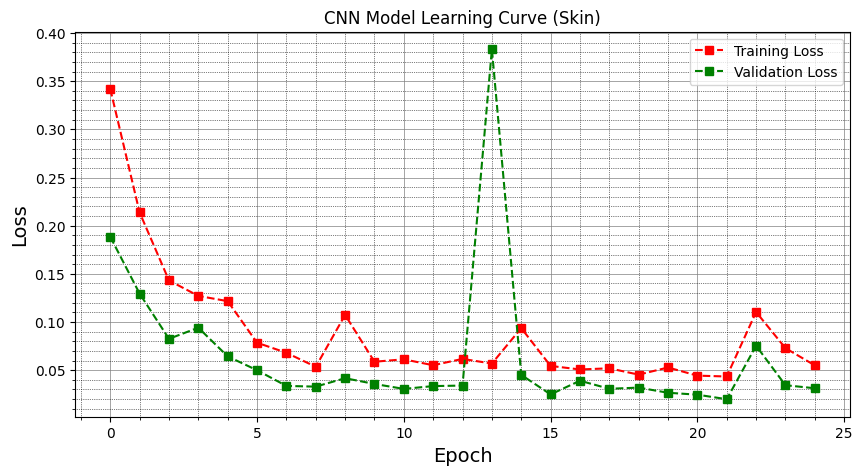

In [80]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history for your model,
# and 'history.history['val_loss']' contains the validation loss history

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 's--', color= 'Red', label='Training Loss')
plt.plot(history.history['val_loss'], 's--',color= 'Green',label='Validation Loss')  # Corrected to use the same history object
plt.title('CNN Model Learning Curve (Skin)')
plt.ylabel('Loss',fontsize=14)
plt.xlabel('Epoch',fontsize=14)
plt.legend()

# Adding grid with major and minor lines
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')  # Major grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')  # Minor grid
plt.minorticks_on()  # Enable minor ticks

#plt.savefig('learn_curve_CNN-2_s_new.png', dpi=1000)  # Uncomment this line if you want to save the plot as a PNG file
plt.show()

In [81]:
# Make predictions on the test set
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_field)
y_pred_train = model.predict(X_train)

# Inverse transform the predictions to get them back to the original scale
y_pred_test_original = y_pred_val# scaler_output.inverse_transform(y_pred_val.reshape(-1, 1)).flatten()
y_pred_val_original = y_field# scaler_output.inverse_transform(y_field.reshape(-1, 1)).flatten()



# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
mse_val = mean_squared_error(y_field, y_pred_val)
mse_train = mean_squared_error(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_val = mean_absolute_error(y_field, y_pred_val)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("Mean Squared Error Test:", mse_test)
print("Mean Absolute Error Test:", mae_test)

print("Mean Squared Error Validation:", mse_val)
print("Mean Absolute Error Validation:", mae_val)

print("Mean Squared Error Train:", mse_train)
print("Mean Absolute Error Train:", mae_train)

r2_test = r2_score(y_test, y_pred_test)
r2_val = r2_score(y_field, y_pred_val)
r2_train = r2_score(y_train, y_pred_train)

print('R-squared Test:', r2_test)
print('R-squared Validation:', r2_val)
print('R-squared Train:', r2_train)
print('CNN-skin')

127/127 [==============================] - 2s 12ms/step
Mean Squared Error Test: 0.01033764926630292
Mean Absolute Error Test: 0.06847642992514152
Mean Squared Error Validation: 0.6280001921607389
Mean Absolute Error Validation: 0.18292110914644755
Mean Squared Error Train: 0.011510918845192546
Mean Absolute Error Train: 0.07019476179453535
R-squared Test: 0.9898112356003536
R-squared Validation: -0.049294860917947325
R-squared Train: 0.9884890811548075
CNN-skin


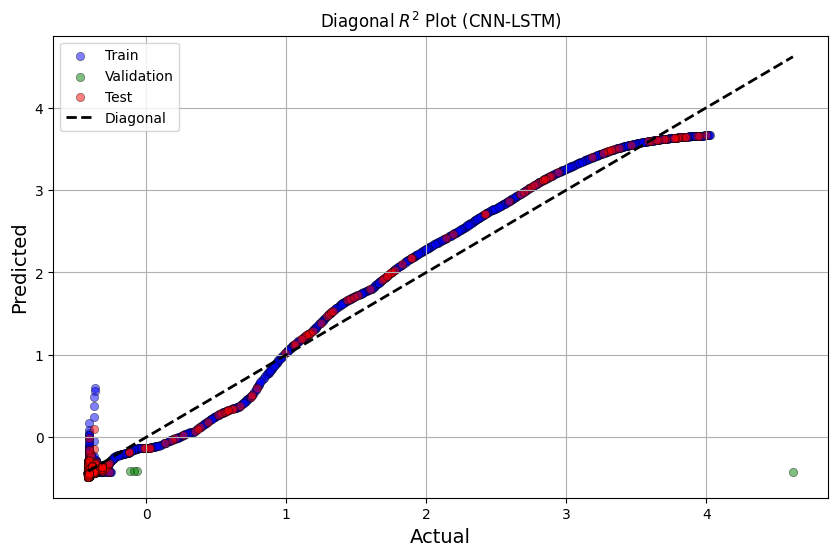

In [84]:
# Calculate R2 scores
r2_test = r2_score(y_test, y_pred_test)
r2_val = r2_score(y_field, y_pred_val)
r2_train = r2_score(y_train, y_pred_train)

# Combine all true values and all predicted values for the diagonal plot
all_true = np.concatenate([y_train, y_field, y_test])
all_pred = np.concatenate([y_pred_train, y_pred_val, y_pred_test])

# Plotting the diagonal R2 score with different colors for each dataset
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train', color='blue', edgecolor='k', linewidth=0.5)
plt.scatter(y_field, y_pred_val, alpha=0.5, label='Validation', color='green', edgecolor='k', linewidth=0.5)
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test', color='red', edgecolor='k', linewidth=0.5)
plt.plot([all_true.min(), all_true.max()], [all_true.min(), all_true.max()], 'k--', lw=2, label='Diagonal')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Diagonal $R^2$ Plot (CNN-LSTM)')
plt.legend()
plt.grid(True)
plt.savefig('Diagonal_r2_CNN-lstm-1_cd_new.png', dpi=1000)  # Uncomment this line if you want to save the plot as a PNG file
# Save the plot as a PDF file
plt.savefig('Diagonal_r2_CNN-lstm-1_cd_new.pdf', format='pdf', dpi=1000)
plt.show()

In [296]:
print(y_pred_test_original)
print(y_pred_val_original)

[[ 0.79554015]
 [ 0.8120191 ]
 [-1.0055016 ]
 [-0.9833725 ]
 [-0.9583912 ]
 [ 3.006586  ]
 [ 2.0200257 ]
 [-0.12535125]
 [-0.07284927]
 [ 0.12100004]
 [ 0.7048835 ]
 [ 0.70492345]
 [ 0.7050402 ]
 [ 0.70509887]
 [ 0.7051007 ]
 [ 0.7050476 ]
 [ 0.70494115]
 [ 0.7047821 ]
 [-0.28775465]
 [-0.2875732 ]
 [-0.2873946 ]
 [-1.2346038 ]
 [-1.1688939 ]
 [-1.2097638 ]
 [-1.2602857 ]
 [-1.2940094 ]
 [-0.01249074]
 [-0.02297889]
 [-0.01812732]
 [-1.822163  ]
 [-1.4702438 ]
 [-1.5627598 ]
 [-1.5638213 ]
 [-1.5592868 ]
 [-1.5278845 ]
 [-1.4792452 ]
 [-1.5155581 ]
 [-1.5778201 ]
 [-1.6292291 ]
 [-1.4989702 ]
 [-1.3244799 ]]
[ 0.91385063  0.93908138 -1.02891709 -1.00368634 -0.97845559  3.10892584
  2.09969586 -0.01968711 -0.01968711 -0.01968711  0.73723538  0.73723538
  0.73723538  0.73723538  0.73723538  0.73723538  0.73723538  0.73723538
 -0.27199461 -0.27199461 -0.27199461 -1.28122459 -1.28122459 -1.28122459
 -1.28122459 -1.28122459 -1.78583958 -1.78583958 -1.78583958 -0.01968711
  1.24185037 -1.281

# Cross Validation 

In [189]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Initialize KFold with 10 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the scores from each fold
mse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in kfold.split(X_train):
    model = CNN_LSTM()
    
    # Train the model
    model.fit(X_train[train_index], y_train[train_index], 
              epochs=100, batch_size=64, verbose=0)  # Verbose set to 0 for cleaner output
    
    # Evaluate the model
    y_pred = model.predict(X_train[test_index], verbose=0)
    mse = np.mean((y_train[test_index] - y_pred.ravel())**2)
    mae = mean_absolute_error(y_train[test_index], y_pred.ravel())
    r2 = r2_score(y_train[test_index], y_pred.ravel())

    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Calculate the average and standard deviation of MSE, MAE, and R2 scores
mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
mae_mean = np.mean(mae_scores)
mae_std = np.std(mae_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

In [191]:
print(f"Cross-Validation Results: CNN-lstm Model")
print(f"Mean MSE: {mse_mean:.4f} ± {mse_std:.4f}")
print(f"Mean MAE: {mae_mean:.4f} ± {mae_std:.4f}")
print(f"Mean R2: {r2_mean:.4f} ± {r2_std:.4f}")

Cross-Validation Results: CNN-lstm Model
Mean MSE: 0.0070 ± 0.0019
Mean MAE: 0.0578 ± 0.0110
Mean R2: 0.9930 ± 0.0021


# Tuning hyperparameters 

In [177]:
# LSTM
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Conv1D, Dense, LSTM, Dropout, Flatten, BatchNormalization

def build_model(hp):
    model = Sequential()
    
    # First Conv1D layer with L2 regularization
    model.add(Conv1D(filters=hp.Int('conv1d_filters1', min_value=32, max_value=128, step=32), 
                     kernel_size=hp.Int('conv1d_kernel1', min_value=3, max_value=7, step=2), 
                     activation='relu', 
                     input_shape=(X_train.shape[1], 2),
                     kernel_regularizer=l2(hp.Float('l2_reg1', min_value=0.001, max_value=0.01, step=0.001))))
    model.add(BatchNormalization())

    # Second Conv1D layer with L2 regularization
    model.add(Conv1D(filters=hp.Int('conv1d_filters2', min_value=32, max_value=128, step=32), 
                     kernel_size=hp.Int('conv1d_kernel2', min_value=3, max_value=7, step=2), 
                     activation='relu',
                     kernel_regularizer=l2(hp.Float('l2_reg2', min_value=0.001, max_value=0.01, step=0.001))))
    model.add(BatchNormalization())

    if hp.Boolean('dropout'):
        model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(LSTM(hp.Int('lstm_units', min_value=10, max_value=100, step=10), return_sequences=True))
    model.add(Flatten())

    # Dense layer with L2 regularization
    model.add(Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), 
                    activation='relu', 
                    kernel_regularizer=l2(hp.Float('l2_reg_dense', min_value=0.001, max_value=0.01, step=0.001))))
    model.add(Dropout(rate=hp.Float('dropout_rate_dense', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

In [178]:
tuner = kt.Hyperband(
    build_model,
    objective='val_mean_squared_error',
    max_epochs=100,
    hyperband_iterations=1,
    directory='my_dir',
    project_name='cnn_lstm_tuning_4000_k'
)

tuner.search(X_train, y_train, epochs=100, validation_split=0.2)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 253 Complete [00h 03m 57s]
val_mean_squared_error: 0.010760825127363205

Best val_mean_squared_error So Far: 0.0046835788525640965
Total elapsed time: 02h 22m 24s

Search: Running Trial #254

Value             |Best Value So Far |Hyperparameter
32                |96                |conv1d_filters1
5                 |3                 |conv1d_kernel1
0.003             |0.007             |l2_reg1
128               |96                |conv1d_filters2
3                 |7                 |conv1d_kernel2
0.009             |0.001             |l2_reg2
False             |True              |dropout
80                |30                |lstm_units
64                |32                |dense_units
0.005             |0.002             |l2_reg_dense
0.1               |0.1               |dropout_rate_dense
0.3               |0.2               |dropout_rate
100               |100               |tuner/epochs
0                 |34                |tuner/initial_epoch
0                 |3          


KeyboardInterrupt



In [179]:
#CNN
print(f"""
The hyperparameter search is complete. 
Optimal number of filters in the first Conv1D layer: {best_hps.get('conv1d_filters1')}
Optimal kernel size for the first Conv1D layer: {best_hps.get('conv1d_kernel1')}
Optimal number of filters in the second Conv1D layer: {best_hps.get('conv1d_filters2')}
Optimal kernel size for the second Conv1D layer: {best_hps.get('conv1d_kernel2')}
Optimal L2 regularization strength for the first Conv1D layer: {best_hps.get('l2_reg1')}
Optimal L2 regularization strength for the second Conv1D layer: {best_hps.get('l2_reg2')}
Optimal number of units in the Dense layer: {best_hps.get('dense_units')}
Optimal number of LSTM units: {best_hps.get('lstm_units')}
Optimal L2 regularization strength for the Dense layer: {best_hps.get('l2_reg_dense')}
Optimal dropout rate for the Conv1D layers: {best_hps.get('dropout_rate')}
Optimal dropout rate for the Dense layer: {best_hps.get('dropout_rate_dense')}
""")

KeyError: 'lstm_units does not exist.'

In [132]:
#LSTM
print(f"""
The hyperparameter search is complete. 
Optimal number of filters in the first Conv1D layer: {best_hps.get('conv1d_filters1')}
Optimal kernel size for the first Conv1D layer: {best_hps.get('conv1d_kernel1')}
Optimal number of filters in the second Conv1D layer: {best_hps.get('conv1d_filters2')}
Optimal kernel size for the second Conv1D layer: {best_hps.get('conv1d_kernel2')}
Optimal number of LSTM units: {best_hps.get('lstm_units')}
Optimal number of units in the Dense layer: {best_hps.get('dense_units')}
Optimal dropout rate: {best_hps.get('dropout_rate')}
""")


The hyperparameter search is complete. 
Optimal number of filters in the first Conv1D layer: 128
Optimal kernel size for the first Conv1D layer: 5
Optimal number of filters in the second Conv1D layer: 32
Optimal kernel size for the second Conv1D layer: 5
Optimal number of LSTM units: 90
Optimal number of units in the Dense layer: 128
Optimal dropout rate: 0.5



In [244]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Flatten
from tensorflow.keras.optimizers import Adam

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = Flatten()(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(1, activation="linear")(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Example usage:
input_shape = (X_train.shape[1], 2)
model = build_transformer_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    dropout=0.1,
    mlp_dropout=0.1,
)



In [245]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
91/91 [==============================] - 70s 684ms/step - loss: 0.6806 - mean_squared_error: 0.6806 - val_loss: 0.1835 - val_mean_squared_error: 0.1835
Epoch 2/100
91/91 [==============================] - 62s 685ms/step - loss: 0.3756 - mean_squared_error: 0.3756 - val_loss: 0.1653 - val_mean_squared_error: 0.1653
Epoch 3/100
91/91 [==============================] - 60s 654ms/step - loss: 0.3564 - mean_squared_error: 0.3564 - val_loss: 0.1682 - val_mean_squared_error: 0.1682
Epoch 4/100
91/91 [==============================] - 46s 506ms/step - loss: 0.4578 - mean_squared_error: 0.4578 - val_loss: 0.3113 - val_mean_squared_error: 0.3113
Epoch 5/100
91/91 [==============================] - 45s 497ms/step - loss: 0.3386 - mean_squared_error: 0.3386 - val_loss: 0.2634 - val_mean_squared_error: 0.2634
Epoch 6/100
91/91 [==============================] - 45s 494ms/step - loss: 0.2542 - mean_squared_error: 0.2542 - val_loss: 0.1855 - val_mean_squared_error: 0.1855
Epoch 7/100
91/9

In [246]:
# Make predictions on the test set
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_field)
y_pred_train = model.predict(X_train)

# Inverse transform the predictions to get them back to the original scale
y_pred_test_original = y_pred_val# scaler_output.inverse_transform(y_pred_val.reshape(-1, 1)).flatten()
y_pred_val_original = y_field# scaler_output.inverse_transform(y_field.reshape(-1, 1)).flatten()



# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
mse_val = mean_squared_error(y_field, y_pred_val)
mse_train = mean_squared_error(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_val = mean_absolute_error(y_field, y_pred_val)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("Mean Squared Error Test:", mse_test)
print("Mean Absolute Error Test:", mae_test)

print("Mean Squared Error Validation:", mse_val)
print("Mean Absolute Error Validation:", mae_val)

print("Mean Squared Error Train:", mse_train)
print("Mean Absolute Error Train:", mae_train)

r2_test = r2_score(y_test, y_pred_test)
r2_val = r2_score(y_field, y_pred_val)
r2_train = r2_score(y_train, y_pred_train)

print('R-squared Test:', r2_test)
print('R-squared Validation:', r2_val)
print('R-squared Train:', r2_train)
print('CNN')
3

101/101 [==============================] - 27s 269ms/step
Mean Squared Error Test: 0.06994709960725498
Mean Absolute Error Test: 0.19322402995865537
Mean Squared Error Validation: 0.3470260172337512
Mean Absolute Error Validation: 0.5114849134786992
Mean Squared Error Train: 0.06857315032954495
Mean Absolute Error Train: 0.1916848054871619
R-squared Test: 0.9312564408001989
R-squared Validation: 0.72273222587719
R-squared Train: 0.9314268496704551
CNN


3

# Field Data 

In [23]:
# # GPT say the this may lead to data leackage 
# # Assuming the field data is available as field_t, field_p, field_dp, field_output
# Y = test.values

# field_t = Y[:,314:414].astype(float)
# field_p = Y[:,414:514].astype(float)
# field_dp = Y[:,514:614].astype(float)
# field_output = Y[:,list].astype(float)

# # Standardize the field data using the previously fitted scalers
# field_t_standardized = scaler_t.transform(np.log(field_t))
# field_p_standardized = scaler_p.transform(np.log(field_p))
# field_dp_standardized = scaler_dp.transform(np.log(field_dp))

# # Combine field_t, field_p, and field_dp into a single array
# combined_field_data = np.stack((field_t_standardized, field_p_standardized, field_dp_standardized), axis=2)

In [12]:
# Assuming the field data is available as field_t, field_p, field_dp, field_output
Y = test.values

# Extract field data
field_t = Y[:,615:715].astype(float)
field_p = Y[:,415:515].astype(float)
field_dp = Y[:,515:615].astype(float)
field_output = Y[:,list].astype(float)

# Standardize the field data using the previously fitted scalers
field_t_standardized = scaler_t.transform(np.log(field_t))
field_p_standardized = scaler_p.transform(np.log(field_p))
field_dp_standardized = scaler_dp.transform(np.log(field_dp))

# Standardize the field output data using the previously fitted scaler
field_output_standardized = scaler_output.transform(field_output.reshape(-1, 1)).flatten()

# Combine field_t, field_p, and field_dp into a single array
combined_field_data = field_dp_standardized# np.stack((field_t_standardized,  field_dp_standardized), axis=2)

# Check the shape of the combined field data
print("Combined field data shape:", combined_field_data.shape)

Combined field data shape: (3, 100)


In [13]:
# Make predictions on the unseen field data
field_predictions = model.predict(combined_field_data)

# Inverse transform the predictions to get them back to the original scale
field_predictions_original_scale = scaler_output.inverse_transform(field_predictions.reshape(-1, 1)).flatten()

# Display the predictions
print("Predictions on field data (original scale):", field_predictions_original_scale)

1/1 [==============================] - 0s 19ms/step
Predictions on field data (original scale): [-4050.5903 -1742.9509  2570.1196]


In [14]:
# Make predictions on the field data
field_predictions = model.predict(combined_field_data)

1/1 [==============================] - 0s 21ms/step


In [15]:
#New 
# If field_output is available, evaluate the performance
field_output_standardized = scaler_output.transform(field_output.reshape(-1, 1)).flatten()

# Make predictions on the unseen field data
field_predictions_standardized = model.predict(combined_field_data).flatten()

# Evaluate the model on the field data
mse_field = mean_squared_error(field_output_standardized, field_predictions_standardized)
mae_field = mean_absolute_error(field_output_standardized, field_predictions_standardized)
r2_field = r2_score(field_output_standardized, field_predictions_standardized)

print("Mean Squared Error Field:", mse_field)
print("Mean Absolute Error Field:", mae_field)
print('R-squared Field:', r2_field)

# Inverse transform the predictions and actual values to get them back to the original scale
field_predictions_original_scale = scaler_output.inverse_transform(field_predictions_standardized.reshape(-1, 1)).flatten()
field_output_original_scale = scaler_output.inverse_transform(field_output_standardized.reshape(-1, 1)).flatten()

# Display the predictions and actual values on the original scale
print("Predictions on field data (original scale):", field_predictions_original_scale)
print("Actual field data (original scale):", field_output_original_scale)

1/1 [==============================] - 0s 16ms/step
Mean Squared Error Field: 26.682640011969344
Mean Absolute Error Field: 4.895493086437953
R-squared Field: -34173.17220319193
Predictions on field data (original scale): [-4050.5903 -1742.9509  2570.1196]
Actual field data (original scale): [ 4.8 41.  10. ]


In [21]:
# # If field_output is available, evaluate the performance
# field_output_standardized = scaler_output.transform(field_output.reshape(-1, 1)).flatten()

# # Evaluate the model on the field data
# mse_field = mean_squared_error(field_output_standardized, field_predictions)
# mae_field = mean_absolute_error(field_output_standardized, field_predictions)
# r2_field = r2_score(field_output_standardized, field_predictions)

# print("Mean Squared Error Field:", mse_field)
# print("Mean Absolute Error Field:", mae_field)
# print('R-squared Field:', r2_field)

Mean Squared Error Field: 0.15453336133419912
Mean Absolute Error Field: 0.3520185560789417
R-squared Field: -20.933067245403738


In [39]:
field_output.shape

(250, 1)

In [121]:
# To inverse transform the predictions back to the original scale
field_predictions_original_scale = scaler_output.inverse_transform(field_predictions)

# Print original scale results
print("Field Predictions (original scale):", field_predictions_original_scale)

Field Predictions (original scale): [[ 15647.297 ]
 [-67672.5   ]
 [ 16054.951 ]
 [-17530.541 ]
 [ -4568.0986]
 [ -6374.006 ]]


In [45]:
test.iloc[:,list]

,K
0,4.8
1,41.0
2,10.0
3,14.1
4,100.0
5,100.0


In [96]:
from keras.layers import Input, Dense, LSTM, Conv1D, Dropout, Bidirectional, Multiply, Flatten, Permute, RepeatVector, Lambda
from keras.models import Model
from keras import backend as K
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.callbacks import EarlyStopping

SINGLE_ATTENTION_VECTOR = False

def attention_3d_block(inputs):
    input_dim = int(inputs.shape[2])
    a = Dense(input_dim, activation='softmax')(inputs)
    if SINGLE_ATTENTION_VECTOR:
        a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
        a = RepeatVector(input_dim)(a)
    a_probs = Permute((1, 2), name='attention_vec')(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

def NormalizeMult(data):
    data = np.array(data)
    normalize = np.arange(2 * data.shape[1], dtype='float64').reshape(data.shape[1], 2)
    for i in range(data.shape[1]):
        listlow, listhigh = np.percentile(data[:, i], [0, 100])
        normalize[i, 0] = listlow
        normalize[i, 1] = listhigh
        delta = listhigh - listlow
        if delta != 0:
            data[:, i] = (data[:, i] - listlow) / delta
    return data, normalize

def FNormalizeMult(data, normalize):
    data = np.array(data)
    for i in range(data.shape[1]):
        listlow = normalize[i, 0]
        listhigh = normalize[i, 1]
        delta = listhigh - listlow
        if delta != 0:
            data[:, i] = data[:, i] * delta + listlow
    return data

def attention_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=1, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    lstm_out = Bidirectional(LSTM(lstm_units, return_sequences=True))(x)
    lstm_out = Dropout(0.3)(lstm_out)
    attention_mul = attention_3d_block(lstm_out)
    attention_mul = Flatten()(attention_mul)
    output = Dense(1, activation='linear')(attention_mul)
    model = Model(inputs=inputs, outputs=output)
    return model

In [97]:
# Define model parameters
TIME_STEPS = combined_data.shape[1]
INPUT_DIMS = combined_data.shape[2]
lstm_units = 64

# Create and compile the model
m = attention_model((TIME_STEPS, INPUT_DIMS))
m.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100, 3)]             0         []                            
                                                                                                  
 conv1d_20 (Conv1D)          (None, 100, 64)              256       ['input_3[0][0]']             
                                                                                                  
 dropout_4 (Dropout)         (None, 100, 64)              0         ['conv1d_20[0][0]']           
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 100, 128)             66048     ['dropout_4[0][0]']           
 onal)                                                                                      

In [98]:
m.compile(optimizer='adam', loss='mse')

In [99]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
m.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/150
6/6 [==============================] - 4s 149ms/step - loss: 1.1046 - val_loss: 0.8079
Epoch 2/150
6/6 [==============================] - 0s 37ms/step - loss: 1.0999 - val_loss: 0.8039
Epoch 3/150
6/6 [==============================] - 0s 37ms/step - loss: 1.0912 - val_loss: 0.8008
Epoch 4/150
6/6 [==============================] - 0s 39ms/step - loss: 1.0863 - val_loss: 0.7967
Epoch 5/150
6/6 [==============================] - 0s 37ms/step - loss: 1.0734 - val_loss: 0.7780
Epoch 6/150
6/6 [==============================] - 0s 37ms/step - loss: 1.0498 - val_loss: 0.7499
Epoch 7/150
6/6 [==============================] - 0s 38ms/step - loss: 1.0176 - val_loss: 0.7261
Epoch 8/150
6/6 [==============================] - 0s 38ms/step - loss: 0.9521 - val_loss: 0.5949
Epoch 9/150
6/6 [==============================] - 0s 38ms/step - loss: 0.8388 - val_loss: 0.6351
Epoch 10/150
6/6 [==============================] - 0s 37ms/step - loss: 0.7158 - val_loss: 0.6423
Epoch 11/150
6/6 [

In [100]:
# Make predictions on the test set
y_pred_test = m.predict(X_test)
y_pred_val = m.predict(X_val)
y_pred_train = m.predict(X_train)

# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Mean Squared Error Test:", mse_test)
print("Mean Absolute Error Test:", mae_test)
print("R-squared Test:", r2_test)

print("Mean Squared Error Validation:", mse_val)
print("Mean Absolute Error Validation:", mae_val)
print("R-squared Validation:", r2_val)

print("Mean Squared Error Train:", mse_train)
print("Mean Absolute Error Train:", mae_train)
print("R-squared Train:", r2_train)

6/6 [==============================] - 0s 10ms/step
Mean Squared Error Test: 0.3194231581221359
Mean Absolute Error Test: 0.3945967695752177
R-squared Test: 0.4658378280293711
Mean Squared Error Validation: 0.2797491865095424
Mean Absolute Error Validation: 0.40802388504023546
R-squared Validation: 0.6558171784707698
Mean Squared Error Train: 0.35902607289673477
Mean Absolute Error Train: 0.456399513150163
R-squared Train: 0.6747677963544972


In [101]:
# Make predictions on the field data
field_predictions = m.predict(combined_field_data)

# If field_output is available, evaluate the performance
field_output_standardized = scaler_output.transform(field_output.reshape(-1, 1)).flatten()

# Evaluate the model on the field data
mse_field = mean_squared_error(field_output_standardized, field_predictions)
mae_field = mean_absolute_error(field_output_standardized, field_predictions)
r2_field = r2_score(field_output_standardized, field_predictions)

print("Mean Squared Error Field:", mse_field)
print("Mean Absolute Error Field:", mae_field)
print('R-squared Field:', r2_field)

1/1 [==============================] - 0s 23ms/step
Mean Squared Error Field: 1.823501001670846
Mean Absolute Error Field: 1.3432481534559744
R-squared Field: -233.45023811201517


In [102]:
# To inverse transform the predictions back to the original scale
field_predictions_original_scale = scaler_output.inverse_transform(field_predictions)

# Print original scale results
print("Field Predictions (original scale):", field_predictions_original_scale)

Field Predictions (original scale): [[655.06006]
 [538.00665]
 [709.3772 ]
 [669.4247 ]
 [694.8837 ]
 [708.1064 ]]


In [88]:
field_output

array([[  4.8],
       [ 41. ],
       [ 10. ],
       [ 14.1],
       [100. ],
       [100. ]])